In [1]:
import os
import numpy as np
import pickle
import warnings
import scipy.io as sio
import matplotlib.pyplot as plt
from Optimize import Optimize

warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
def load_orig_file(mat_fname):
    mat_contents = sio.loadmat(mat_fname)
    tvec = np.squeeze(mat_contents['tvec_post']).astype(np.float32)
    frames = np.squeeze(mat_contents['volume_post']).astype(np.float32)
    return tvec, frames


__file__ = '/Users/mona/Documents/data/registration/voxelmorph/MOLLI_original/0379217_20131018_MOLLI.mat'
filename = __file__
tvec, frames = load_orig_file(filename)
print(tvec.shape)

(11,)


In [3]:
new_frames = frames[::10,::10,:]
print(new_frames.shape)

(24, 24, 11)


Time elapsed: 0.057115836938222246 mins


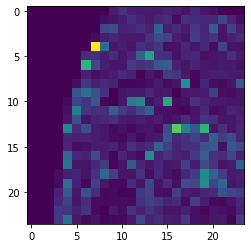

In [4]:
opt = Optimize()
inversion_recovery_img, pmap, sdmap, null_index, S = opt.synthesis(tvec, new_frames)
initial_T1 = S
plt.imshow(initial_T1)

In [5]:
inversion_recovery_img.shape

(24, 24, 11)

In [6]:
I = new_frames
M = np.dstack([initial_T1] * new_frames.shape[-1])
S = inversion_recovery_img

In [7]:
energy = opt.energy(I, M, S)

In [8]:
energy

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.00000000e+00, 4.00000000e+00, 4.00000000e+00, ...,
         1.00000000e+00, 0.00000000e+00, 9.00000000e+00],
        [1.60000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
         1.00000000e+00, 1.00000000e+00, 4.00000000e+00],
        [7.42679032e+01, 1.65930368e+02, 2.90098297e+02, ...,
         4.26517399e+02, 3.66885433e+02, 3.95701416e+02]],

       [[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 